# Visualization gene expression data

Previously we merged the gene expression data files of various diseases together. In this notebook we will some basic visualizations to get a better understanding of our data before we are going to integrate it with our network. In this notebook we will use the merged_data_final.txt file.

#### The following step only works in RStudio. If working in another environment, please set the working directory properly and check if the working directory is correct. 

In [ ]:
# set working directory to where file is saved
setwd(dirname(rstudioapi::callFun("getActiveDocumentContext")$path))

In [1]:
# get working directory
getwd()

[1] "C:/Users/Laurent/Documents/GitHub/inflammation_networks2/Jupyter - Cleaning & merging data"

In [1]:
# load in libraries
library(dplyr)
library(gplots)
library(RColorBrewer)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union

Warning message:
"package 'gplots' was built under R version 3.5.2"
Attaching package: 'gplots'

The following object is masked from 'package:stats':

    lowess

Warning message:
"package 'RColorBrewer' was built under R version 3.5.2"

In [2]:
# load in merged data file
dataset <- read.table(file.path(getwd(), "Datasets", "merged_data_final.txt"), header = T, sep = "\t")
pwGenes <- read.table(file.path(getwd(), "Datasets", "pwgenes.txt"), header = T, sep = "\t")
inflGenes <- read.table(file.path(getwd(), "Datasets", "merged_infl_genes.txt"), header = T, sep = "\t")

dataset <- dataset[dataset$entrezgene %in% pwGenes$entrezgene,]

### log Fold Change and p-value
The merged data files contains 6 diseases, and 8 datasets. It contains the following diseases: breast cancer, lung cancer, metabolically unhealthy obese, rheumatoid arthritis,cardiomyopathy and systemic lupus erythematosus.

We first start with plotting the log fold change (LogFC) and the p.value (PValue) of all datasets.

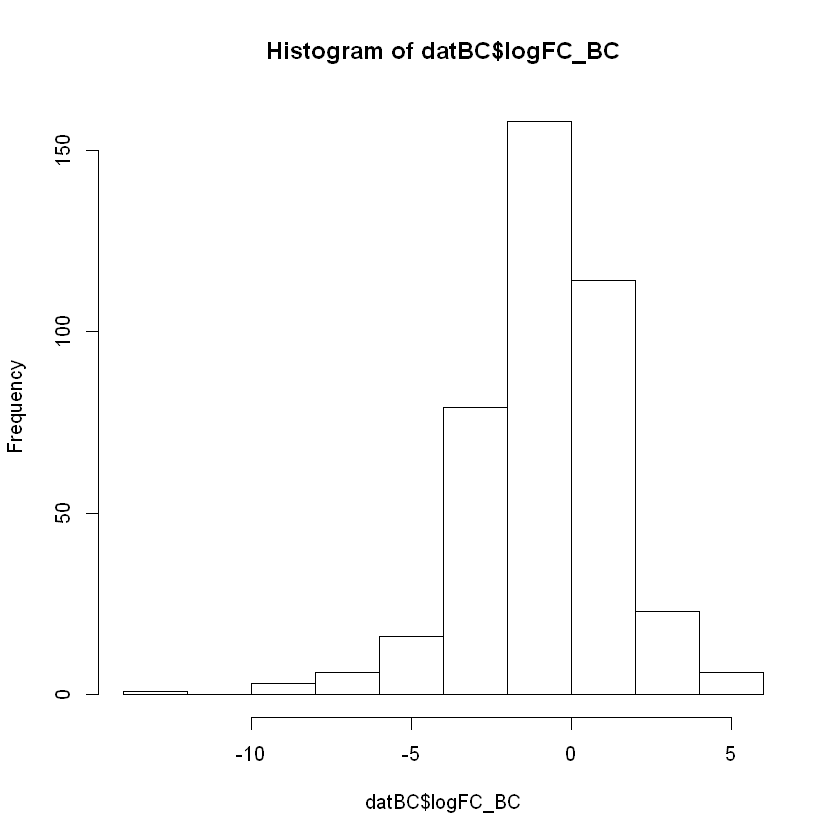

,entrezgene,hgnc_symbol,logFC_BC,PValue_BC
21,572,BAD,1.30012657,0.011579067
40,8837,CFLAR,-2.36341068,0.000189463
41,8837,CFLAR,-2.36341068,0.000189463
96,1387,CREBBP,-0.25057172,0.406873313
98,4353,MPO,-1.62245883,0.102294888
111,3683,ITGAL,0.03348179,0.949460737


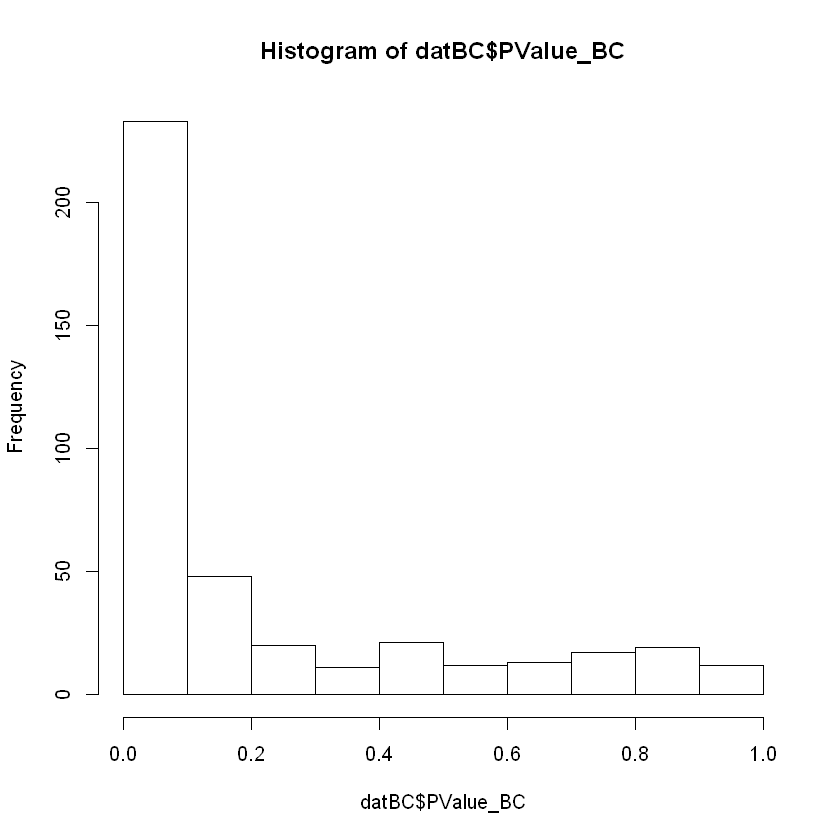

In [3]:
# breast cancer
datBC <- dataset[,-5:-16]
datBC <- na.omit(datBC)
hist(datBC$logFC_BC)
hist(datBC$PValue_BC)
head(datBC)

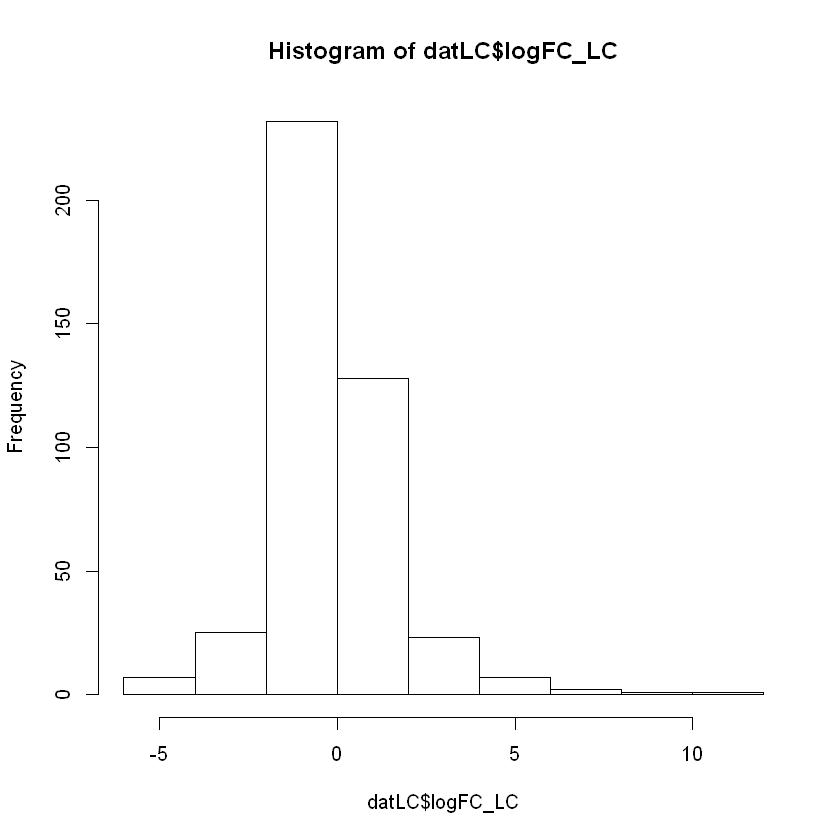

,entrezgene,hgnc_symbol,logFC_LC,PValue_LC
21,572,BAD,-0.2364393,0.678109901
40,8837,CFLAR,-0.9003248,0.035051720
41,8837,CFLAR,-0.9003248,0.035051720
96,1387,CREBBP,-0.2728974,0.408924360
98,4353,MPO,-0.6992241,0.403822810
111,3683,ITGAL,-1.8676739,0.000113644


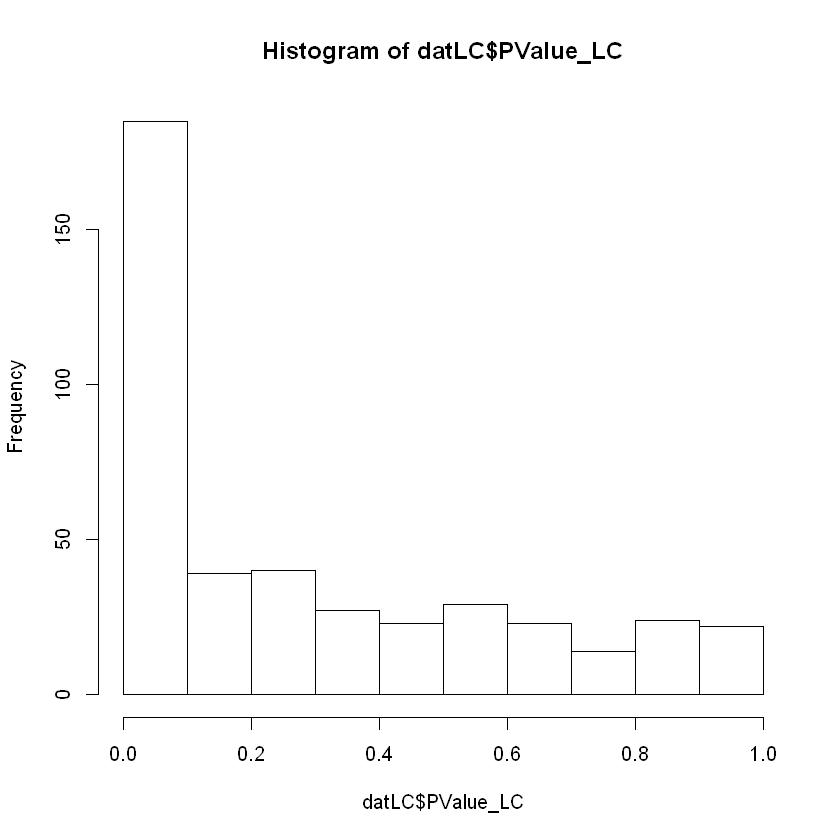

In [4]:
# lung cancer
datLC <- dataset[,c(-3,-4,-7:-16)]
datLC <- na.omit(datLC)
hist(datLC$logFC_LC)
hist(datLC$PValue_LC)
head(datLC)

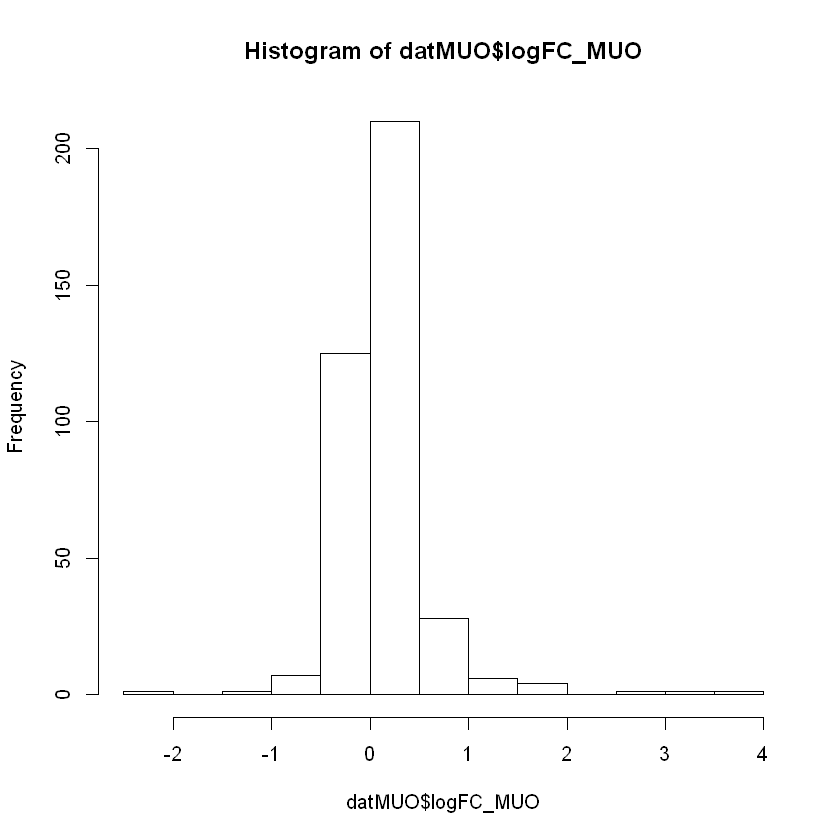

,entrezgene,hgnc_symbol,logFC_MUO,PValue_MUO
21,572,BAD,0.011038645,0.882893931
40,8837,CFLAR,-0.092093332,0.182310154
41,8837,CFLAR,-0.074497769,0.204760091
96,1387,CREBBP,0.009730749,0.885018203
98,4353,MPO,-0.091360910,0.009776241
111,3683,ITGAL,0.632132396,0.000053200


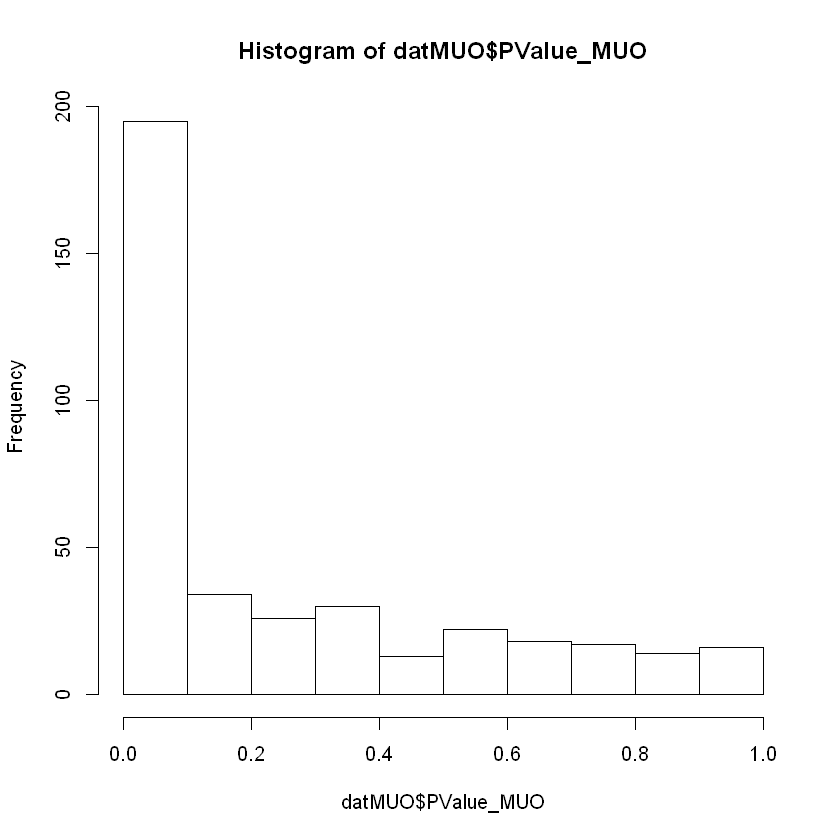

In [5]:
# metabolically unhealthy obese
datMUO <- dataset[,c(-3:-6,-9:-16)]
datMUO <- na.omit(datMUO)
hist(datMUO$logFC_MUO)
hist(datMUO$PValue_MUO)
head(datMUO)

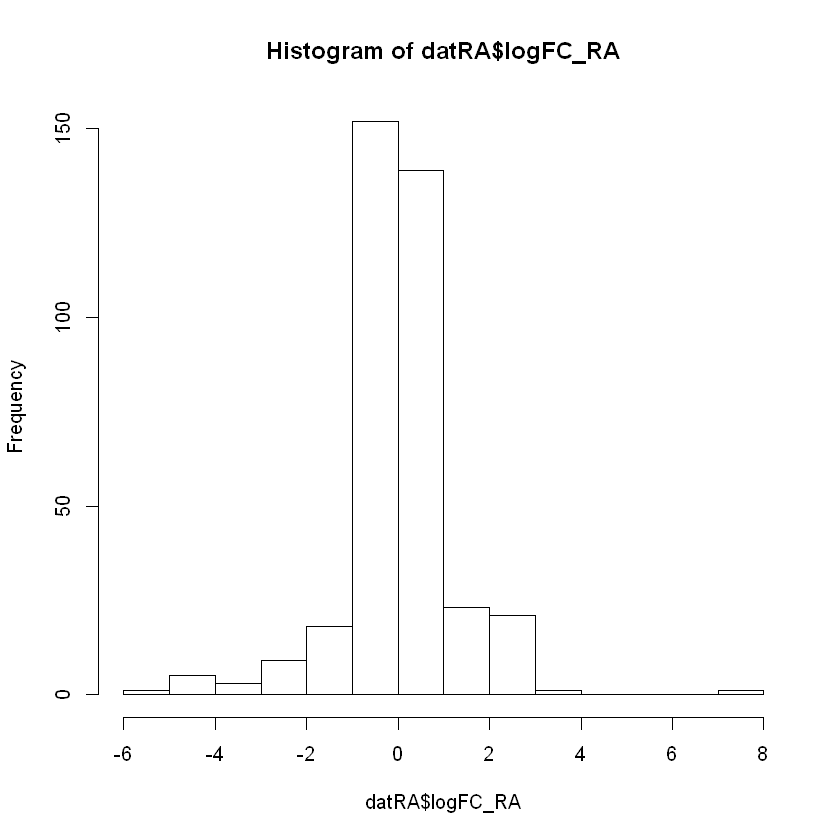

,entrezgene,hgnc_symbol,logFC_RA,PValue_RA
21,572,BAD,0.007609654,9.322607e-01
40,8837,CFLAR,-0.054253568,8.150366e-01
41,8837,CFLAR,-0.054253568,8.150366e-01
96,1387,CREBBP,-0.219000215,3.059827e-02
98,4353,MPO,0.031264167,5.867719e-01
111,3683,ITGAL,1.273246121,5.504818e-11


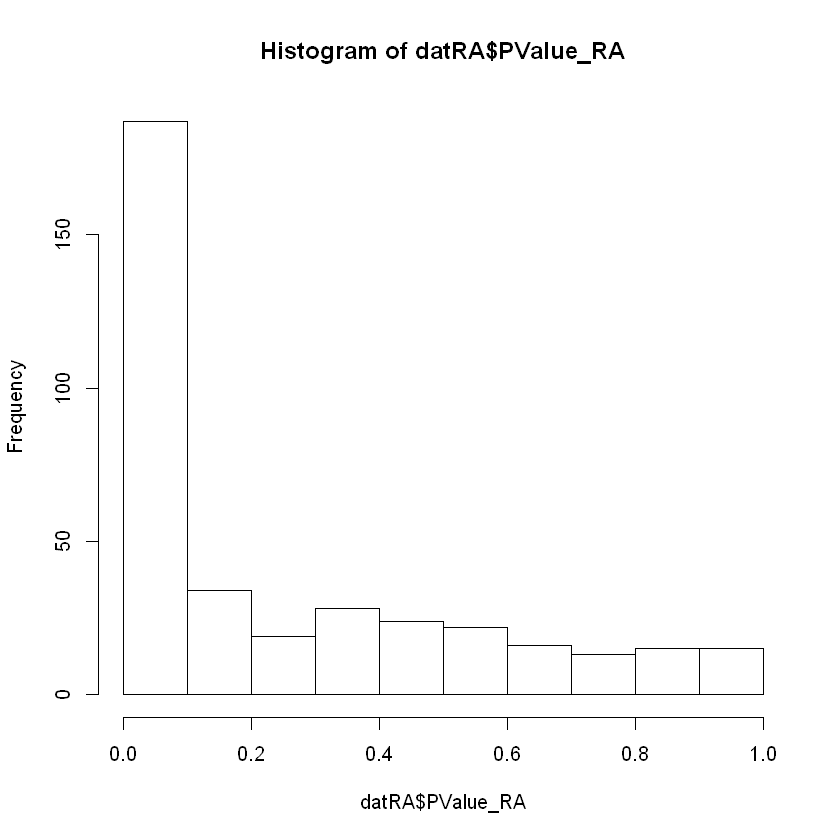

In [6]:
# rheumatoid arthritis
datRA <- dataset[,c(-3:-8,-11:-16)]
datRA <- na.omit(datRA)
hist(datRA$logFC_RA)
hist(datRA$PValue_RA)
head(datRA)

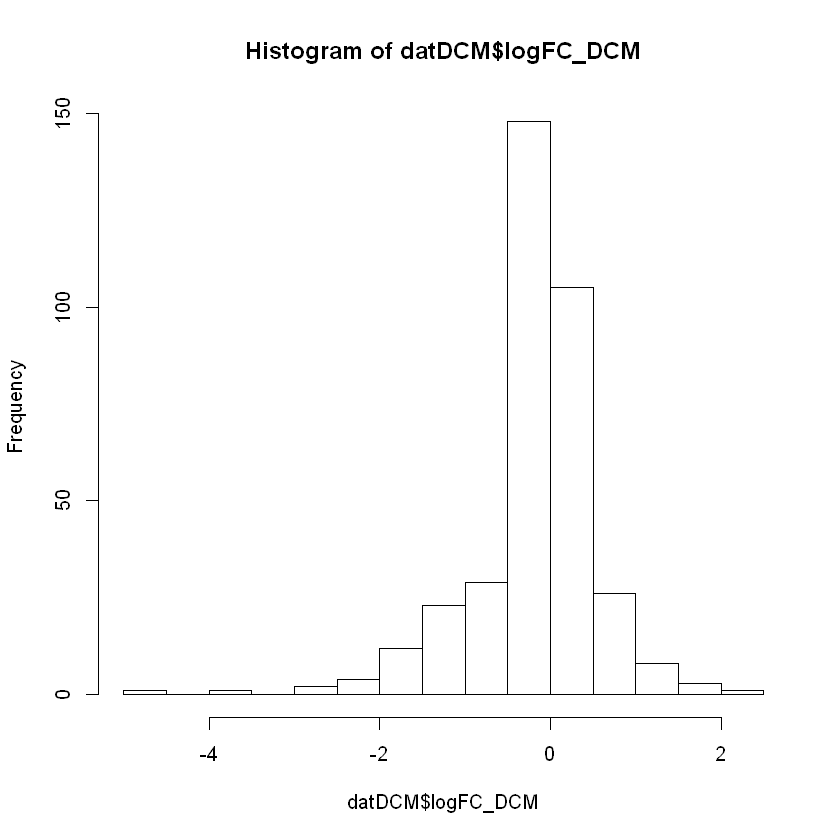

,entrezgene,hgnc_symbol,logFC_DCM,PValue_DCM
21,572,BAD,-0.06581474,0.73692297
40,8837,CFLAR,-0.04456432,0.74319857
41,8837,CFLAR,-0.04456432,0.74319857
96,1387,CREBBP,-0.08341177,0.49923591
98,4353,MPO,0.37304506,0.55174821
111,3683,ITGAL,0.79459600,0.04268294


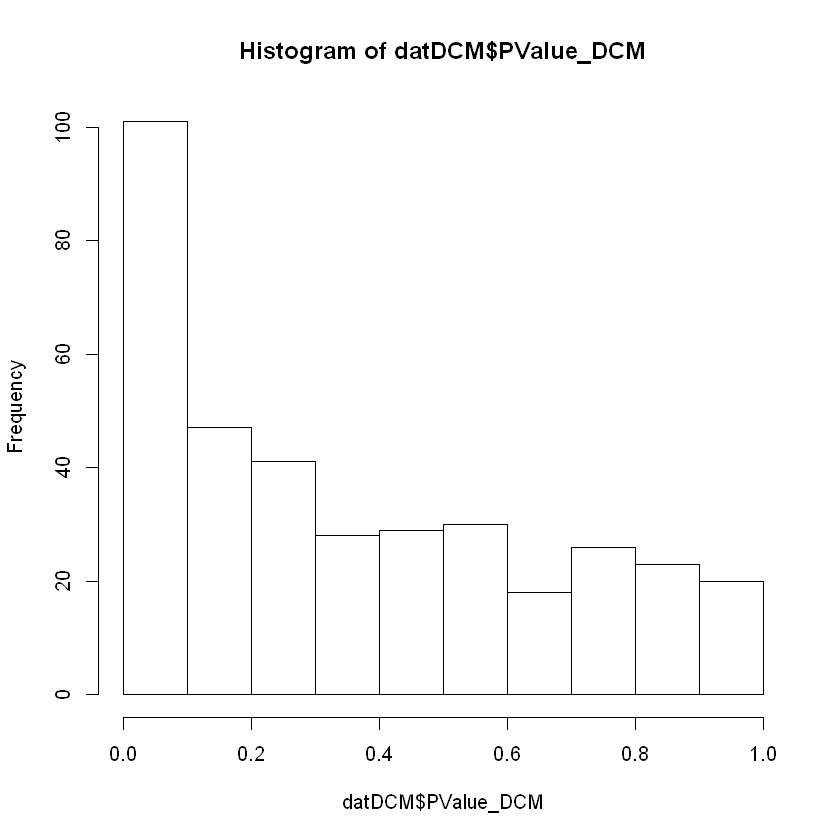

In [7]:
# DCM
datDCM <- dataset[,c(-3:-10,-13:-16)]
datDCM <- na.omit(datDCM)
hist(datDCM$logFC_DCM)
hist(datDCM$PValue_DCM)
head(datDCM)

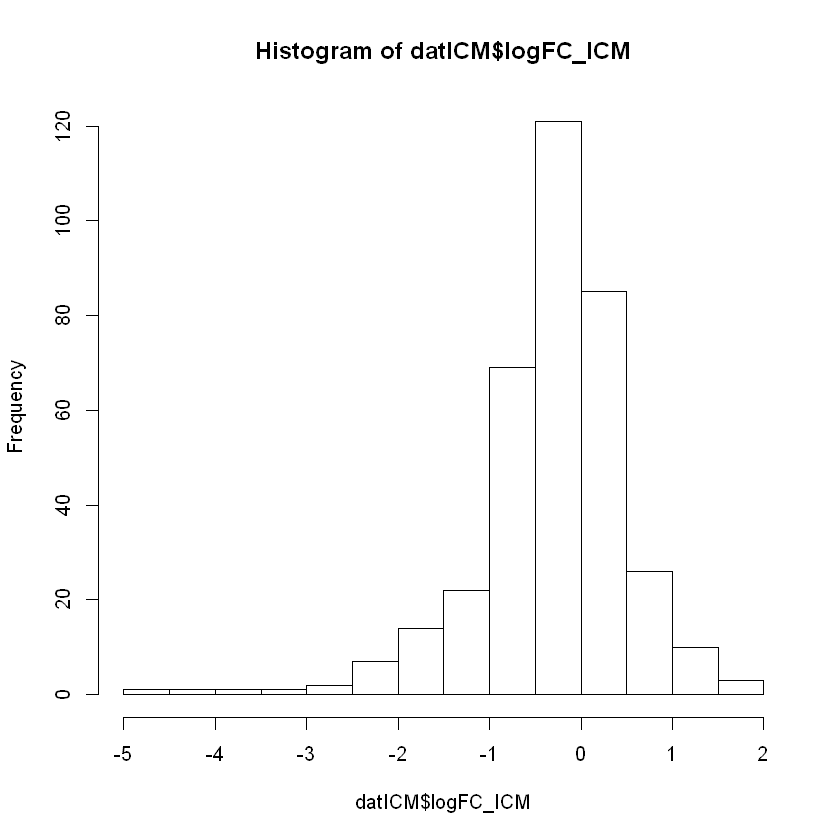

,entrezgene,hgnc_symbol,logFC_ICM,PValue_ICM
21,572,BAD,0.34989726,0.06263541
40,8837,CFLAR,-0.07295253,0.64275117
41,8837,CFLAR,-0.07295253,0.64275117
96,1387,CREBBP,-0.12596498,0.35667478
98,4353,MPO,0.29705613,0.63926582
111,3683,ITGAL,0.05589086,0.85624100


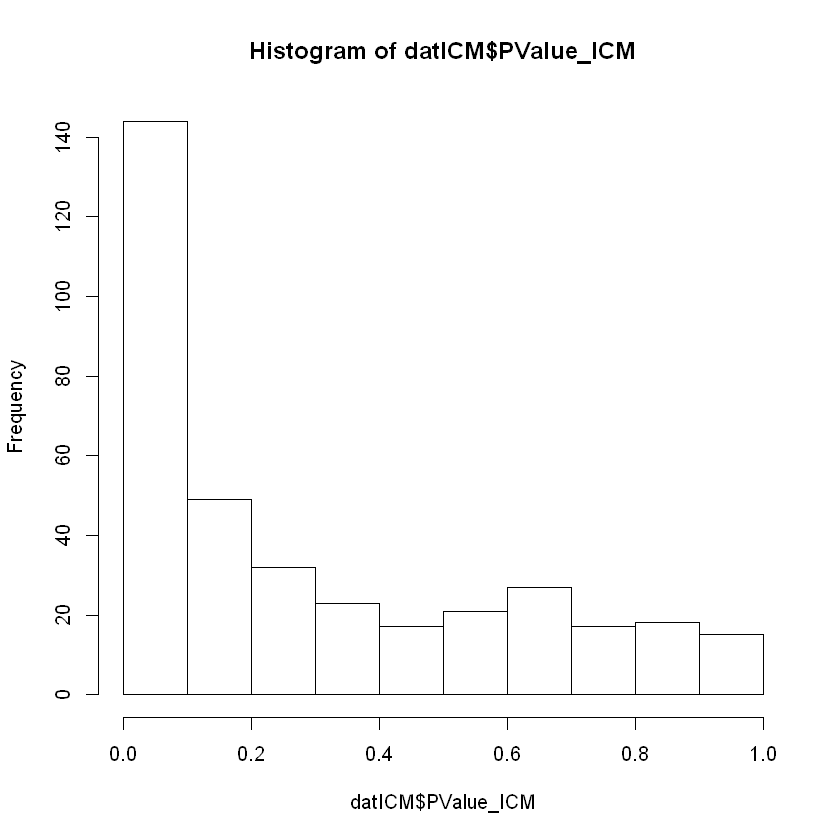

In [8]:
# ICM
datICM <- dataset[,c(-3:-12,-15:-16)]
datICM <- na.omit(datICM)
hist(datICM$logFC_ICM)
hist(datICM$PValue_ICM)
head(datICM)

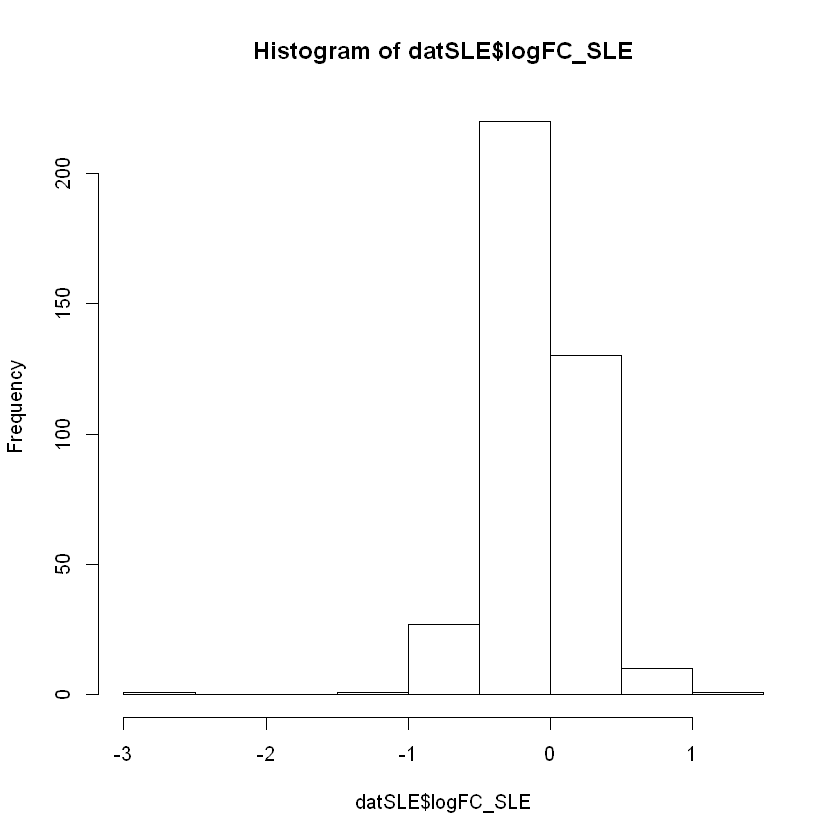

,entrezgene,hgnc_symbol,logFC_SLE,PValue_SLE
21,572,BAD,0.000000000,1.000000e+00
40,8837,CFLAR,-0.636725088,4.768234e-03
41,8837,CFLAR,-0.636725088,4.768234e-03
96,1387,CREBBP,-0.021242595,9.482814e-01
98,4353,MPO,0.221139335,1.174282e-05
111,3683,ITGAL,0.007922311,9.805294e-01


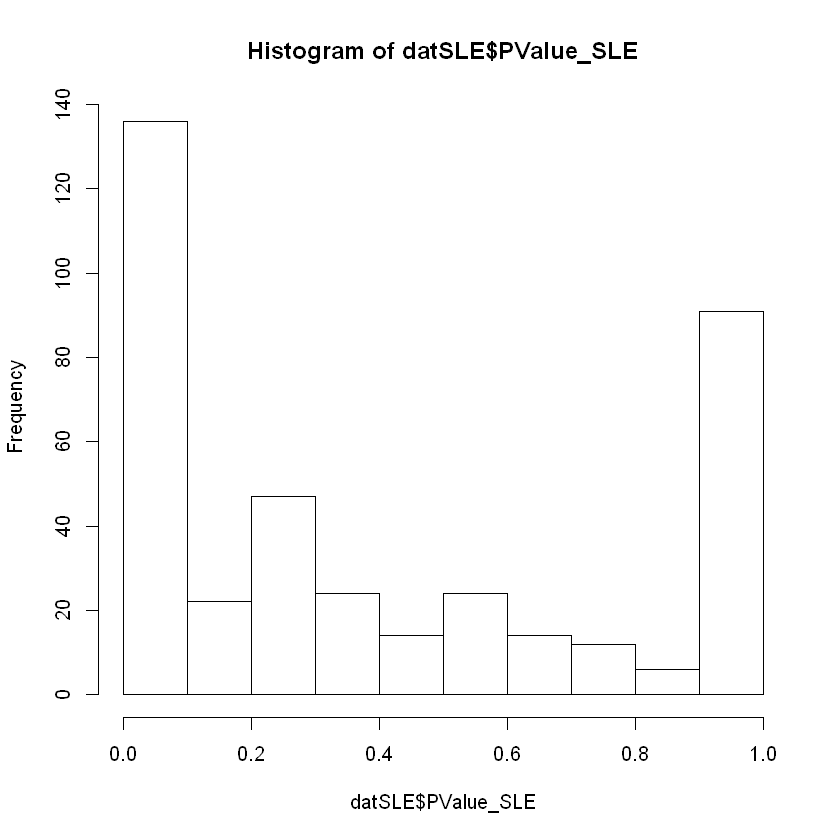

In [9]:
# systemic lupus erythematosus
datSLE <- dataset[,c(-3:-14)]
datSLE <- na.omit(datSLE)
hist(datSLE$logFC_SLE)
hist(datSLE$PValue_SLE)
head(datSLE)

For all datasets, the fold change is quite what we want to see. No datasets has high frequencies at the respective extremities. For the p.values however, we that systemic lupus erythematosus and lung cancer have a higher frequency of p.value = 1.0 compared to the other datasets and comapred to the other p.values within the dataset. 

### Significant differentially expressed genes
It is interesting to see the number and percentage of significant differentially expressed genes per dataset. In this case we chose and log fold change lower than -0.58 and higher than 0.58.

So, let us check what these values are!

In [10]:
# breast cancer
datBC1 <- subset(datBC, datBC$logFC_BC <= -0.58)
datBC2 <- subset(datBC, datBC$logFC_BC >= 0.58)
datBC3 <- rbind(datBC1, datBC2)
datBC4 <- subset(datBC3, datBC3$PValue_BC <= 0.05) # data frame with significant differentially expressed genes
nBC <- nrow(datBC4)
print(paste0("The number of significant differentially expressed genes is ", nBC))
percBC <- (as.numeric(nBC) / as.numeric(nrow(datBC)) * 100)
percBC <- as.numeric(format(round(percBC, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percBC, "%"))

[1] "The number of significant differentially expressed genes is 198"
[1] "The percentage of significant differentially expressed genes is 48.77%"


In [11]:
# lung cancer
datLC1 <- subset(datLC, datLC$logFC_LC <= -0.58)
datLC2 <- subset(datLC, datLC$logFC_LC >= 0.58)
datLC3 <- rbind(datLC1, datLC2)
datLC4 <- subset(datLC3, datLC3$PValue_LC <= 0.05) # data frame with significant differentially expressed genes
nLC <- nrow(datLC4)
print(paste0("The number of significant differentially expressed genes is ", nLC))
percLC <- (as.numeric(nLC) / as.numeric(nrow(datLC)) * 100)
percLC <- as.numeric(format(round(percLC, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percLC, "%"))

[1] "The number of significant differentially expressed genes is 147"
[1] "The percentage of significant differentially expressed genes is 34.51%"


In [12]:
# metabolically unhealthy obese
datMUO1 <- subset(datMUO, datMUO$logFC_MUO <= -0.58)
datMUO2 <- subset(datMUO, datMUO$logFC_MUO >= 0.58)
datMUO3 <- rbind(datMUO1, datMUO2)
datMUO4 <- subset(datMUO3, datMUO3$PValue_MUO <= 0.05) # data frame with significant differentially expressed genes
nMUO <- nrow(datMUO4)
print(paste0("The number of significant differentially expressed genes is ", nMUO))
percMUO <- (as.numeric(nMUO) / as.numeric(nrow(datMUO)) * 100)
percMUO <- as.numeric(format(round(percMUO, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percMUO, "%"))

[1] "The number of significant differentially expressed genes is 44"
[1] "The percentage of significant differentially expressed genes is 11.43%"


In [13]:
# rheumatoid arthritis
datRA_1 <- subset(datRA, datRA$logFC_RA <= -0.58)
datRA_2 <- subset(datRA, datRA$logFC_RA >= 0.58)
datRA_3 <- rbind(datRA_1, datRA_2)
datRA_4 <- subset(datRA_3, datRA_3$PValue_RA <= 0.05) # data frame with significant differentially expressed genes
nRA <- nrow(datRA_4)
print(paste0("The number of significant differentially expressed genes is ", nRA))
percRA <- (as.numeric(nRA) / as.numeric(nrow(datRA)) * 100)
percRA <- as.numeric(format(round(percRA, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percRA, "%"))

[1] "The number of significant differentially expressed genes is 111"
[1] "The percentage of significant differentially expressed genes is 29.76%"


In [14]:
# DCM
datDCM1 <- subset(datDCM, datDCM$logFC_DCM <= -0.58)
datDCM2 <- subset(datDCM, datDCM$logFC_DCM >= 0.58)
datDCM3 <- rbind(datDCM1, datDCM2)
datDCM4 <- subset(datDCM3, datDCM3$PValue_DCM <= 0.05) # data frame with significant differentially expressed genes
nDCM <- nrow(datDCM4)
print(paste0("The number of significant differentially expressed genes is ", nDCM))
percDCM <- (as.numeric(nDCM) / as.numeric(nrow(datDCM)) * 100)
percDCM <- as.numeric(format(round(percDCM, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percDCM, "%"))

[1] "The number of significant differentially expressed genes is 62"
[1] "The percentage of significant differentially expressed genes is 17.08%"


In [15]:
# ICM
datICM1 <- subset(datICM, datICM$logFC_ICM <= -0.58)
datICM2 <- subset(datICM, datICM$logFC_ICM >= 0.58)
datICM3 <- rbind(datICM1, datICM2)
datICM4 <- subset(datICM3, datICM3$PValue_ICM <= 0.05) # data frame with significant differentially expressed genes
nICM <- nrow(datICM4)
print(paste0("The number of significant differentially expressed genes is ", nICM))
percICM <- (as.numeric(nICM) / as.numeric(nrow(datICM)) * 100)
percICM <- as.numeric(format(round(percICM, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percICM, "%"))

[1] "The number of significant differentially expressed genes is 88"
[1] "The percentage of significant differentially expressed genes is 24.24%"


In [16]:
# systemic lupuc erythematosus
datSLE1 <- subset(datSLE, datSLE$logFC_SLE <= -0.58)
datSLE2 <- subset(datSLE, datSLE$logFC_SLE >= 0.58)
datSLE3 <- rbind(datSLE1, datSLE2)
datSLE4 <- subset(datSLE3, datSLE3$PValue_SLE <= 0.05) # data frame with significant differentially expressed genes
nSLE <- nrow(datSLE4)
print(paste0("The number of significant differentially expressed genes is ", nSLE))
percSLE <- (as.numeric(nSLE) / as.numeric(nrow(datSLE)) * 100)
percSLE <- as.numeric(format(round(percSLE, 2), nsmall = 2))
print(paste0("The percentage of significant differentially expressed genes is ", percSLE, "%"))

[1] "The number of significant differentially expressed genes is 24"
[1] "The percentage of significant differentially expressed genes is 6.15%"


### Clear visualization
Now we have these values, let's put them into a data frame so it is easily to read!

In [17]:
# create data frame from significant differentially expressed genes and percentage of these genes
sigGenes <- c(nBC, nLC, nMUO, nRA, nDCM, nICM, nSLE)
percGenes <- c(paste0(percBC, "%"), paste0(percLC, "%"), 
              paste0(percMUO, "%"), paste0(percRA, "%"), 
              paste0(percDCM, "%"), paste0(percICM, "%"), paste0(percSLE, "%"))
Disease <- c("Breast cancer", "Lung cancer", "MUO", "Rheumatoid arthritis",
                                                    "DCM", "ICM", "SLE")
df2 <- data.frame(Disease, sigGenes, percGenes)
colnames(df2)[c(2,3)] <- c("Significant Genes (n)", "Percentage Significant Genes")

# save data frame as text file
write.table(df2, file.path(getwd(), "Results", "pw_genes", "0.58sigGenes.txt"), sep = "\t", row.names = F, quote = F)

# view table
df2

Disease,Significant Genes (n),Percentage Significant Genes
Breast cancer,198,48.77%
Lung cancer,147,34.51%
MUO,44,11.43%
Rheumatoid arthritis,111,29.76%
DCM,62,17.08%
ICM,88,24.24%
SLE,24,6.15%


## Further visualization
It is isteresting to visualize the amount of significant up- and downregulated genes per disease. The easiest method to visualize this, is to create a barplot.

BC,LC,MUO,RA,DCM,ICM,SLE
48,42,37,61,17,14,9
150,105,7,50,45,74,15


jpeg 
   3

png 
  2

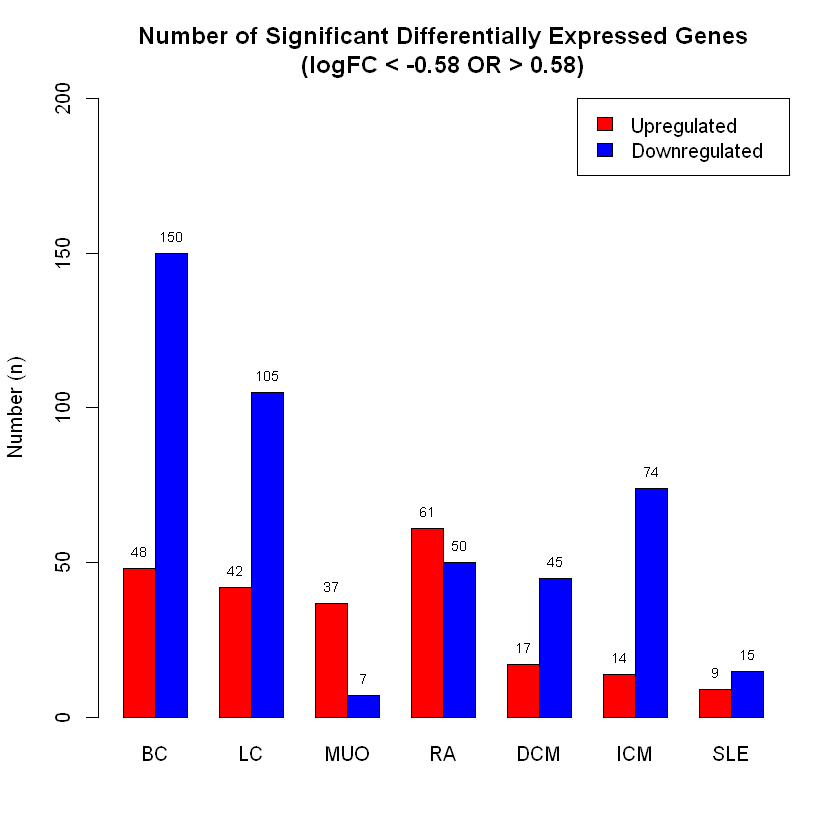

In [18]:
# store values of significant up- and downregulated genes as variables to make a barplot out of them
# because we only stored the genes with a log fold change lower than -0.58 or higher than 0.58, we still have to select the significant genes with a p-value lower < 0.05
# we have to store these numbers seperately to create a distinction between to two in the matrix and thus barplot
downBC <- nrow(subset(datBC1, datBC1$PValue_BC <= 0.05))
upBC <- nrow(subset(datBC2, datBC2$PValue_BC <= 0.05))
downLC <- nrow(subset(datLC1, datLC1$PValue_LC <= 0.05))
upLC <- nrow(subset(datLC2, datLC2$PValue_LC <= 0.05))
downMUO <- nrow(subset(datMUO1, datMUO1$PValue_MUO <= 0.05))
upMUO <- nrow(subset(datMUO2, datMUO2$PValue_MUO <= 0.05))
downRA <- nrow(subset(datRA_1, datRA_1$PValue_RA <= 0.05))
upRA <- nrow(subset(datRA_2, datRA_2$PValue_RA <= 0.05))
downDCM <- nrow(subset(datDCM1, datDCM1$PValue_DCM <= 0.05))
upDCM <- nrow(subset(datDCM2, datDCM2$PValue_DCM <= 0.05))
downICM <- nrow(subset(datICM1, datICM1$PValue_ICM <= 0.05))
upICM <- nrow(subset(datICM2, datICM2$PValue_ICM <= 0.05))
downSLE <- nrow(subset(datSLE1, datSLE1$PValue_SLE <= 0.05))
upSLE <- nrow(subset(datSLE2, datSLE2$PValue_SLE <= 0.05))

# create matrix before creating barplot
df1 <- matrix(ncol = 7, nrow = 2)
colnames(df1) <- c("BC", "LC", "MUO", "RA", "DCM", "ICM", "SLE")
df1[1,1] = upBC
df1[2,1] = downBC
df1[1,2] = upLC
df1[2,2] = downLC
df1[1,3] = upMUO
df1[2,3] = downMUO
df1[1,4] = upRA
df1[2,4] = downRA
df1[1,5] = upDCM
df1[2,5] = downDCM
df1[1,6] = upICM
df1[2,6] = downICM
df1[1,7] = upSLE
df1[2,7] = downSLE

df1

# create barplot
bar_plot <- barplot(df1, beside = TRUE, main = "Number of Significant Differentially Expressed Genes
(logFC < -0.58 OR > 0.58)",
                    names.arg = c(colnames(df1)), 
                    ylab = "Number (n)", 
                    ylim = c(0, 200),
                    col = c("#FF0000", "#0000FF", "#FF0000", "#0000FF", "#FF0000", "#0000FF", "#FF0000",
                            "#0000FF", "#FF0000","#0000FF", "#FF0000", "#0000FF", "#FF0000", "#0000FF"),
                    legend = c("Upregulated", "Downregulated"),
                    args.legend = list(x = "topright"))
text(bar_plot, c(48, 150, 42, 105, 37, 7, 61, 50, 17, 45, 14, 74, 9, 15) ,df1 ,cex= 0.7 ,pos = 3) 


# save barplot as image
dev.copy(jpeg, filename = file.path(getwd(),"Results", "pw_genes", "0.58barplot_nSigGenes.jpg"));
dev.off ();

To look easier at the percentage of significant differentially expressed genes, and compare these values easier between the different datasets, we should make a barplot out of these values. 

jpeg 
   3

png 
  2

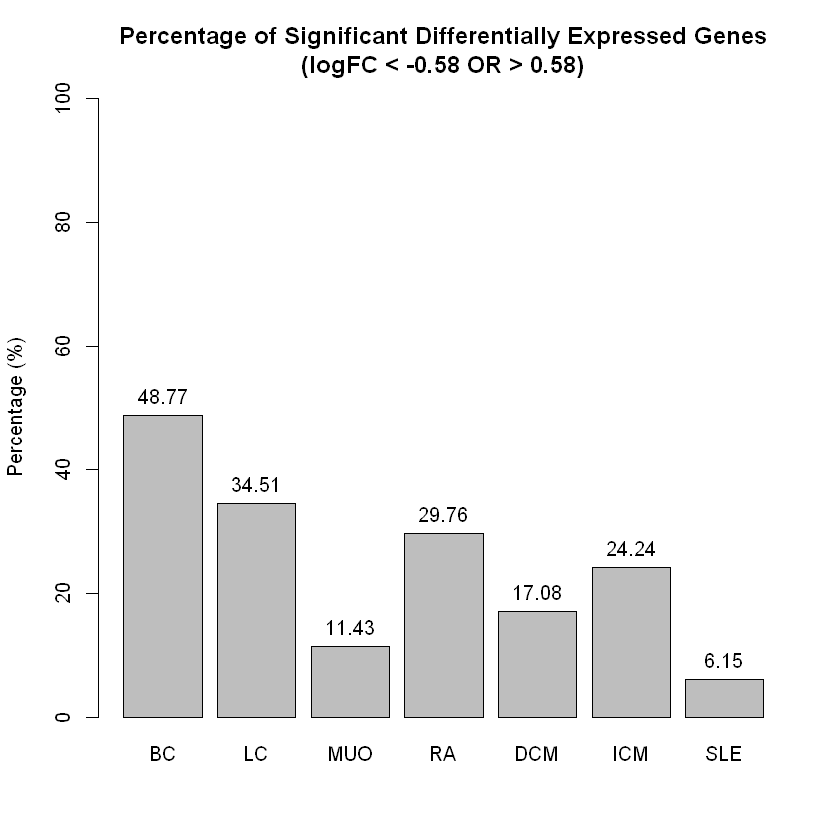

In [19]:
# create barplot of percentage of significant differentially expressed genes
x <- as.numeric(c(percBC, percLC, percMUO, percRA, percDCM, percICM, percSLE))
y <- c("BC", "LC", "MUO", "RA", "DCM", "ICM", "SLE")
bar_plot1 <- barplot(x, main = "Percentage of Significant Differentially Expressed Genes
(logFC < -0.58 OR > 0.58)",
        names.arg = c(y), ylab = "Percentage (%)",
        ylim = c(0,100))
text(bar_plot1, c(48.77, 34.51, 11.43, 29.76, 17.08, 24.24, 6.15) , x,cex=1 ,pos = 3)

# save boxplot as image
dev.copy(jpeg, filename = file.path(getwd(),"Results", "pw_genes", "0.58barplot_percSigGenes.jpg"));
dev.off ();

It is important to note that these percentages don't represent the perfecentage of significant differentially expressed genes of the _whole genome_. Rather these percentages indicate the significant differentially expressed genes of the _total number of genes measured_ by the respective method used. 

### Amount of similar measured genes
It is also interesting to know how many similar significant differentially expressed genes are measured between two datasets.

In [20]:
# first create an empty data frame
Disease_list <- c("BC", "LC", "MUO", "RA",
                  "DCM", "ICM", "SLE")
df <- data.frame(matrix(ncol = 8, nrow = 7))
colnames(df)[1] <- "Disease"
colnames(df)[2:8] <- Disease_list
df$Disease <- Disease_list
df

Disease,BC,LC,MUO,RA,DCM,ICM,SLE
BC,NA,NA,NA,NA,NA,NA,NA
LC,NA,NA,NA,NA,NA,NA,NA
MUO,NA,NA,NA,NA,NA,NA,NA
RA,NA,NA,NA,NA,NA,NA,NA
DCM,NA,NA,NA,NA,NA,NA,NA
ICM,NA,NA,NA,NA,NA,NA,NA
SLE,NA,NA,NA,NA,NA,NA,NA


In [21]:
# fill in values of data files
df[1,2] = length(datBC4$entrezgene) # breast cancer
df[2,3] = length(datLC4$entrezgene) # lung cancer
df[3,4] = length(datMUO4$entrezgene) # MUO
df[4,5] = length(datRA_4$entrezgene) # rheumatoid arthritis
df[5,6] = length(datDCM4$entrezgene) # DCM
df[6,7] = length(datICM4$entrezgene) # ICM
df[7,8] = length(datSLE4$entrezgene) # SLE

In [22]:
# breast cancer vs the rest
df[1,3] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datLC4$entrezgene))$entrezgene) # lung cancer
df[2,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datLC4$entrezgene))$entrezgene)

df[1,4] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datMUO4$entrezgene))$entrezgene) # MUO
df[3,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datMUO4$entrezgene))$entrezgene)

df[1,5] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datRA_4$entrezgene))$entrezgene) # RA
df[4,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datRA_4$entrezgene))$entrezgene)

df[1,6] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[5,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

df[1,7] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datICM4$entrezgene))$entrezgene) # ICM
df[6,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datICM4$entrezgene))$entrezgene)

df[1,8] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datSLE4$entrezgene))$entrezgene) # SLE
df[7,2] = length(as.data.frame(datBC4 %>% filter(datBC4$entrezgene %in% datSLE4$entrezgene))$entrezgene)

In [23]:
# lung cancer vs the rest
df[2,4] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datMUO4$entrezgene))$entrezgene) # MUO
df[3,3] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datMUO4$entrezgene))$entrezgene)

df[2,5] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datRA_4$entrezgene))$entrezgene) # RA
df[4,3] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datRA_4$entrezgene))$entrezgene)

df[2,6] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[5,3] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

df[2,7] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datICM4$entrezgene))$entrezgene) # ICM
df[6,3] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datICM4$entrezgene))$entrezgene)

df[2,8] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datSLE4$entrezgene))$entrezgene) # SLE
df[7,3] = length(as.data.frame(datLC4 %>% filter(datLC4$entrezgene %in% datSLE4$entrezgene))$entrezgene)

In [24]:
# MUO vs the rest
df[3,5] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datRA_4$entrezgene))$entrezgene) # RA
df[4,4] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datRA_4$entrezgene))$entrezgene)

df[3,6] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[5,4] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

df[3,7] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datICM4$entrezgene))$entrezgene) # ICM
df[6,4] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datICM4$entrezgene))$entrezgene)

df[3,8] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datSLE4$entrezgene))$entrezgene) # SLE
df[7,4] = length(as.data.frame(datMUO4 %>% filter(datMUO4$entrezgene %in% datSLE4$entrezgene))$entrezgene)

In [25]:
# RA235 vs the rest
df[4,6] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datDCM4$entrezgene))$entrezgene) # DCM
df[5,5] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datDCM4$entrezgene))$entrezgene)

df[4,7] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datICM4$entrezgene))$entrezgene) # ICM
df[6,5] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datICM4$entrezgene))$entrezgene)

df[4,8] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datSLE4$entrezgene))$entrezgene) # SLE
df[7,5] = length(as.data.frame(datRA_4 %>% filter(datRA_4$entrezgene %in% datSLE4$entrezgene))$entrezgene)

In [26]:
# DCM vs the rest
df[5,7] = length(as.data.frame(datDCM4 %>% filter(datDCM4$entrezgene %in% datICM4$entrezgene))$entrezgene) # ICM
df[6,6] = length(as.data.frame(datDCM4 %>% filter(datDCM4$entrezgene %in% datICM4$entrezgene))$entrezgene)

df[7,6] = length(as.data.frame(datDCM4 %>% filter(datDCM4$entrezgene %in% datSLE4$entrezgene))$entrezgene) # SLE
df[5,8] = length(as.data.frame(datDCM4 %>% filter(datDCM4$entrezgene %in% datSLE4$entrezgene))$entrezgene)

In [27]:
# ICM vs the rest
df[6,8] = length(as.data.frame(datICM4 %>% filter(datICM4$entrezgene %in% datSLE4$entrezgene))$entrezgene) # SLE
df[7,7] = length(as.data.frame(datICM4 %>% filter(datICM4$entrezgene %in% datSLE4$entrezgene))$entrezgene)

In [28]:
# save data frame as text file
write.table(df, file.path(getwd(), "Results", "pw_genes", "0.58n_sigGenes.txt"), sep = "\t", row.names = F, quote = F)

# view table
df

Disease,BC,LC,MUO,RA,DCM,ICM,SLE
BC,198,76,26,63,36,46,13
LC,76,147,14,49,27,34,12
MUO,26,14,44,28,12,12,2
RA,63,49,28,111,25,33,5
DCM,36,27,12,25,62,40,2
ICM,46,34,12,33,40,88,7
SLE,13,12,2,5,2,7,24


In [29]:
# create another empty data frame, just like before
df_perc <- data.frame(matrix(ncol = 8, nrow = 7))
colnames(df_perc)[1] <- "Disease"
colnames(df_perc)[2:8] <- Disease_list
df_perc$Disease <- Disease_list

# fill in the number of significant differntially expressed genes per disease
# fill in values of data files
df_perc[1,2] = length(datBC4$entrezgene) # breast cancer
df_perc[2,3] = length(datLC4$entrezgene) # lung cancer
df_perc[3,4] = length(datMUO4$entrezgene) # MUO
df_perc[4,5] = length(datRA_4$entrezgene) # rheumatoid arthritis
df_perc[5,6] = length(datDCM4$entrezgene) # DCM
df_perc[6,7] = length(datICM4$entrezgene) # ICM
df_perc[7,8] = length(datSLE4$entrezgene) # SLE

In [30]:
# breast cancer
df_perc[1,3] = round(((df[1,3] / df_perc[1,2]) * 100), 1)
df_perc[1,4] = round(((df[1,4] / df_perc[1,2]) * 100), 1)
df_perc[1,5] = round(((df[1,5] / df_perc[1,2]) * 100), 1)
df_perc[1,6] = round(((df[1,6] / df_perc[1,2]) * 100), 1)
df_perc[1,7] = round(((df[1,7] / df_perc[1,2]) * 100), 1)
df_perc[1,8] = round(((df[1,8] / df_perc[1,2]) * 100), 1)

# lung cancer
df_perc[2,2] = round(((df[2,2] / df_perc[2,3]) * 100), 1)
df_perc[2,4] = round(((df[2,4] / df_perc[2,3]) * 100), 1)
df_perc[2,5] = round(((df[2,5] / df_perc[2,3]) * 100), 1)
df_perc[2,6] = round(((df[2,6] / df_perc[2,3]) * 100), 1)
df_perc[2,7] = round(((df[2,7] / df_perc[2,3]) * 100), 1)
df_perc[2,8] = round(((df[2,8] / df_perc[2,3]) * 100), 1)

# MUO
df_perc[3,2] = round(((df[3,2] / df_perc[3,4]) * 100), 1)
df_perc[3,3] = round(((df[3,3] / df_perc[3,4]) * 100), 1)
df_perc[3,5] = round(((df[3,5] / df_perc[3,4]) * 100), 1)
df_perc[3,6] = round(((df[3,6] / df_perc[3,4]) * 100), 1)
df_perc[3,7] = round(((df[3,7] / df_perc[3,4]) * 100), 1)
df_perc[3,8] = round(((df[3,8] / df_perc[3,4]) * 100), 1)

# RA
df_perc[4,2] = round(((df[4,2] / df_perc[4,5]) * 100), 1)
df_perc[4,3] = round(((df[4,3] / df_perc[4,5]) * 100), 1)
df_perc[4,4] = round(((df[4,4] / df_perc[4,5]) * 100), 1)
df_perc[4,6] = round(((df[4,6] / df_perc[4,5]) * 100), 1)
df_perc[4,7] = round(((df[4,7] / df_perc[4,5]) * 100), 1)
df_perc[4,8] = round(((df[4,8] / df_perc[4,5]) * 100), 1)

# DCM
df_perc[5,2] = round(((df[5,2] / df_perc[5,6]) * 100), 1)
df_perc[5,3] = round(((df[5,3] / df_perc[5,6]) * 100), 1)
df_perc[5,4] = round(((df[5,4] / df_perc[5,6]) * 100), 1)
df_perc[5,5] = round(((df[5,5] / df_perc[5,6]) * 100), 1)
df_perc[5,7] = round(((df[5,7] / df_perc[5,6]) * 100), 1)
df_perc[5,8] = round(((df[5,8] / df_perc[5,6]) * 100), 1)

# ICM
df_perc[6,2] = round(((df[6,2] / df_perc[6,7]) * 100), 1)
df_perc[6,3] = round(((df[6,3] / df_perc[6,7]) * 100), 1)
df_perc[6,4] = round(((df[6,4] / df_perc[6,7]) * 100), 1)
df_perc[6,5] = round(((df[6,5] / df_perc[6,7]) * 100), 1)
df_perc[6,6] = round(((df[6,6] / df_perc[6,7]) * 100), 1)
df_perc[6,8] = round(((df[6,8] / df_perc[6,7]) * 100), 1)

# SLE
df_perc[7,2] = round(((df[7,2] / df_perc[7,8]) * 100), 1)
df_perc[7,3] = round(((df[7,3] / df_perc[7,8]) * 100), 1)
df_perc[7,4] = round(((df[7,4] / df_perc[7,8]) * 100), 1)
df_perc[7,5] = round(((df[7,5] / df_perc[7,8]) * 100), 1)
df_perc[7,6] = round(((df[7,6] / df_perc[7,8]) * 100), 1)
df_perc[7,7] = round(((df[7,7] / df_perc[7,8]) * 100), 1)

df_perc1 <- df_perc
df_perc1 <- format(df_perc1, digits = 1)
df_perc1

Disease,BC,LC,MUO,RA,DCM,ICM,SLE
BC,198,38,13,32,18,23,7
LC,52,147,10,33,18,23,8
MUO,59,32,44,64,27,27,4
RA,57,44,25,111,22,30,4
DCM,58,44,19,40,62,64,3
ICM,52,39,14,38,46,88,8
SLE,54,50,8,21,8,29,24


In [31]:
# add percentages, has to go via this way instead of adding it in the lines of code above. 
# While adding it to the lines of code above, errors occur that no numeric values are used in the equation
# breast cancer
df_perc[1,3] = paste(df_perc[1,3],"%")
df_perc[1,4] = paste(df_perc[1,4],"%")
df_perc[1,5] = paste(df_perc[1,5],"%")
df_perc[1,6] = paste(df_perc[1,6],"%")
df_perc[1,7] = paste(df_perc[1,7],"%")
df_perc[1,8] = paste(df_perc[1,8],"%")

# lung cancer
df_perc[2,2] = paste(df_perc[2,2],"%") 
df_perc[2,4] = paste(df_perc[2,4],"%") 
df_perc[2,5] = paste(df_perc[2,5],"%")
df_perc[2,6] = paste(df_perc[2,6],"%")
df_perc[2,7] = paste(df_perc[2,7],"%")
df_perc[2,8] = paste(df_perc[2,8],"%")

# MUO
df_perc[3,2] = paste(df_perc[3,2],"%")
df_perc[3,3] = paste(df_perc[3,3],"%")
df_perc[3,5] = paste(df_perc[3,5],"%")
df_perc[3,6] = paste(df_perc[3,6],"%")
df_perc[3,7] = paste(df_perc[3,7],"%")
df_perc[3,8] = paste(df_perc[3,8],"%")

# RA
df_perc[4,2] = paste(df_perc[4,2],"%")
df_perc[4,3] = paste(df_perc[4,3],"%")
df_perc[4,4] = paste(df_perc[4,4],"%")
df_perc[4,6] = paste(df_perc[4,6],"%")
df_perc[4,7] = paste(df_perc[4,7],"%")
df_perc[4,8] = paste(df_perc[4,8],"%")

# DCM
df_perc[5,2] = paste(df_perc[5,2],"%")
df_perc[5,3] = paste(df_perc[5,3],"%")
df_perc[5,4] = paste(df_perc[5,4],"%")
df_perc[5,5] = paste(df_perc[5,5],"%")
df_perc[5,7] = paste(df_perc[5,7],"%")
df_perc[5,8] = paste(df_perc[5,8],"%")

# ICM
df_perc[6,2] = paste(df_perc[6,2],"%")
df_perc[6,3] = paste(df_perc[6,3],"%")
df_perc[6,4] = paste(df_perc[6,4],"%")
df_perc[6,5] = paste(df_perc[6,5],"%")
df_perc[6,6] = paste(df_perc[6,6],"%")
df_perc[6,8] = paste(df_perc[6,8],"%")

# SLE
df_perc[7,2] = paste(df_perc[7,2],"%")
df_perc[7,3] = paste(df_perc[7,3],"%")
df_perc[7,4] = paste(df_perc[7,4],"%")
df_perc[7,5] = paste(df_perc[7,5],"%")
df_perc[7,6] = paste(df_perc[7,6],"%")
df_perc[7,7] = paste(df_perc[7,7],"%")

# save data frame as text file
write.table(df_perc, file.path(getwd(), "Results", "pw_genes", "0.58perc_n_sigGenes.txt"), sep = "\t", row.names = F, quote = F)

df_perc

Disease,BC,LC,MUO,RA,DCM,ICM,SLE
BC,198,38.4 %,13.1 %,31.8 %,18.2 %,23.2 %,6.6 %
LC,51.7 %,147,9.5 %,33.3 %,18.4 %,23.1 %,8.2 %
MUO,59.1 %,31.8 %,44,63.6 %,27.3 %,27.3 %,4.5 %
RA,56.8 %,44.1 %,25.2 %,111,22.5 %,29.7 %,4.5 %
DCM,58.1 %,43.5 %,19.4 %,40.3 %,62,64.5 %,3.2 %
ICM,52.3 %,38.6 %,13.6 %,37.5 %,45.5 %,88,8 %
SLE,54.2 %,50 %,8.3 %,20.8 %,8.3 %,29.2 %,24


In [32]:
# create matrix from data frame and have first column as rownames
rownames(df_perc1) <- df_perc1$Disease
df_perc1 <- df_perc1[-1]

df_perc1 <- as.matrix(as.data.frame(lapply(df_perc1, as.numeric), row.names = Disease_list))

df_perc_matrix <- as.matrix(df_perc1)
df_perc_matrix

,BC,LC,MUO,RA,DCM,ICM,SLE
BC,198,38,13,32,18,23,7
LC,52,147,10,33,18,23,8
MUO,59,32,44,64,27,27,4
RA,57,44,25,111,22,30,4
DCM,58,44,19,40,62,64,3
ICM,52,39,14,38,46,88,8
SLE,54,50,8,21,8,29,24


Warning message in heatmap.2(as.matrix(df_perc_matrix), cellnote = df_perc_matrix, :
"Discrepancy: Rowv is FALSE, while dendrogram is `both'. Omitting row dendogram."Warning message in heatmap.2(as.matrix(df_perc_matrix), cellnote = df_perc_matrix, :
"Discrepancy: Colv is FALSE, while dendrogram is `column'. Omitting column dendogram."

jpeg 
   3

png 
  2

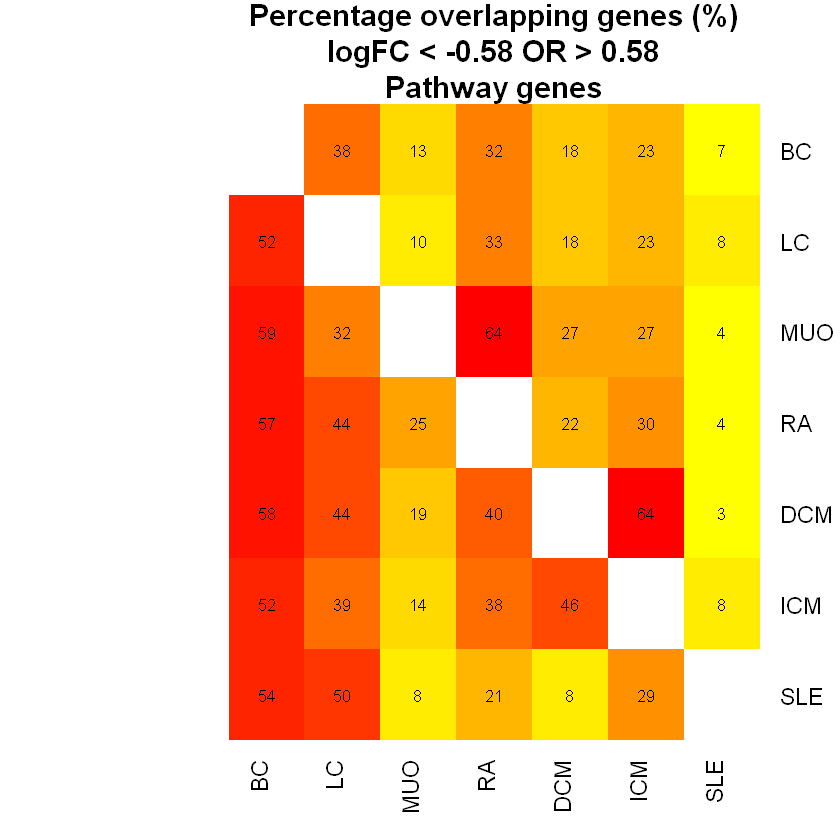

In [33]:
# create color mapping
colfunc <- colorRampPalette(c("yellow", "red"))

# create heatmap
df_perc_matrix[1,1] <- NA
df_perc_matrix[2,2] <- NA
df_perc_matrix[3,3] <- NA
df_perc_matrix[4,4] <- NA
df_perc_matrix[5,5] <- NA
df_perc_matrix[6,6] <- NA
df_perc_matrix[7,7] <- NA

df_perc_hm <- heatmap.2(as.matrix(df_perc_matrix) , cellnote = df_perc_matrix, notecol = "black", 
                     Rowv = NA, Colv = NA, col =colfunc,
                     trace = "none", density.info = "none", key = F,
                     main = "Percentage overlapping genes (%)
logFC < -0.58 OR > 0.58
Pathway genes", margin = c(5,4), lhei = c(1,7))

# save heatmap as image
dev.copy(jpeg, filename = file.path(getwd(),"Results", "pw_genes", "0.58heatmap.jpg"));
dev.off ();